<a href="https://colab.research.google.com/github/yenngocduong/Sign-language-interpreter/blob/main/feature_extraction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# datmaycaitenfancyvao

In [ ]:
!pip install mediapipe

     |████████████████████████████████| 47.4MB 79kB/s 


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
import os
lst = os.listdir('/content/drive/My Drive/EE8101_Deep_Learning/mp4_Videos')
lst = sorted(lst)

In [ ]:
len(lst)
# Should print 17875

17875

In [ ]:
path = '/content/drive/My Drive/EE8101_Deep_Learning/mp4_Videos'

In [ ]:
a = lst[1]
a

'00333_abdomen.mp4'

In [ ]:
import cv2
import mediapipe as mp
from google.colab.patches import cv2_imshow
mp_hands = mp.solutions.hands

In [ ]:
vid_frame_num = np.zeros((17875,), dtype = np.int8)

In [ ]:
vid_idx = 0
for video in lst:
    vid = cv2.VideoCapture('/content/drive/My Drive/EE8101_Deep_Learning/mp4_Videos' + video)
    frame_num = 0
    while True:
        ret, frame = vid.read()
        if ret:
            frame_num += 1
        else:
            break
    vid_frame_num[vid_idx] = frame_num
    vid_idx += 1
    print(str(vid_idx) + ': ' + video + " done")

Streaming output truncated to the last 5000 lines.
12876: 54558_stay.mp4 done
12877: 54559_stay.mp4 done
12878: 54560_stay.mp4 done
12879: 54561_stay.mp4 done
12880: 54562_stay.mp4 done
12881: 54563_stay.mp4 done
12882: 54564_stay.mp4 done
12883: 54565_stay.mp4 done
12884: 54567_stay.mp4 done
12885: 54586_steal.mp4 done
12886: 54588_steal.mp4 done
12887: 54589_steal.mp4 done
12888: 54591_steal.mp4 done
12889: 54592_steal.mp4 done
12890: 54593_steal.mp4 done
12891: 54597_steal.mp4 done
12892: 54598_steal.mp4 done
12893: 54600_steal.mp4 done
12894: 54607_steel.mp4 done
12895: 54609_steel.mp4 done
12896: 54610_steel.mp4 done
12897: 54611_steel.mp4 done
12898: 54612_steel.mp4 done
12899: 54613_steel.mp4 done
12900: 54614_steel.mp4 done
12901: 54616_steel.mp4 done
12902: 54661_stepfather.mp4 done
12903: 54665_stepfather.mp4 done
12904: 54666_stepfather.mp4 done
12905: 54667_stepfather.mp4 done
12906: 54668_stepfather.mp4 done
12907: 54670_stepfather.mp4 done
12908: 54672_stepfather.mp4 done

In [ ]:
vid_frame_num

array([0, 0, 0, ..., 0, 0, 0], dtype=int8)

In [ ]:
np.save("/content/drive/MyDrive/EE8101_Deep_Learning/Frame_num.npy", vid_frame_num)

### **Extracting hand landmark features:**<br>
This is the most important function of all.<br>
Please spend time to study this.

In [ ]:
def hand_tracking_to_np_array(vid_name, frame_num):
    with mp_hands.Hands(      # Initialise mp_hands.Hands
        static_image_mode=True,
        max_num_hands=2,
        min_detection_confidence=0.5) as hands:
            total = np.zeros((frame_num, 2, 21, 3), dtype = np.float_)    # Create tensor of dimension [ frame_num X 2 hands X 21 landmarks X 3 coordinates (lmark.x, lmark.y, lmark.z) ]
            vid = cv2.VideoCapture("/content/drive/My Drive/EE8101_Deep_Learning/mp4_Videos" + vid_name)   # Reading the video file
            query = True
            frame_idx = 0   # Start from frame 0
            for fr in range(frame_num):
                ret, frame = vid.read()   # Next time you read the vid file: ret, frame will be the next frame
                if ret:       # If frame exists
                    results = hands.process(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))     # Extracting results
                    res = results.multi_hand_landmarks      # Tensor data structure: [ left hand object, right hand object ] 
                    # Note: if 0 hands, tensor length = 0; if only 1 hand, tensor length = 1; if 2 hands, tensor length = 2
                    # To access first hand landmark, call the function hand_lm = res[0].landmark
                    # Then hand_lm is an array of dimension [ 21 landmarks ]
                    # To access the x, y, z coordinate of each landmark, we need to implemnent
                    # for lmark in hand_lm: print(lmark.x, lmark.y, lmark.z)
                    # Note: if only 1 hand, res[0] will always output the first hand landmark, whereas res[1] will always be none
                    # res[0] and res[1] does not indicate left or right hand in the scenario of only 1 hand detected
                    so = 0
                    if res == None:     # 0 hands detected
                        total[frame_idx, :, :, :] = np.nan    # Both hands zero padding
                    elif len(res) == 1:       # 1 hand detected
                        lm = 0
                        hand_lm = res[0].landmark   # Focus on that 1 hand; hand_lm is an array of dimension [ 21 landmarks ]
                        for lmark in hand_lm:   # For each landmark; To access coordinates, we need lmark.x, lmark.y, lmark.z
                            total[frame_idx, 0, lm, :] = np.array([lmark.x, lmark.y, lmark.z])
                            lm += 1
                        total[frame_idx, 1, :, :] = np.nan    # For the remaining hand, we implement zero padding
                    else:     # 2 hands detected; alternatively you can say elif len(res)==2: This will also give you the same results
                        lm = 0
                        hand_lm = res[0].landmark   # Left hand first
                        for lmark in hand_lm:
                            total[frame_idx, 0, lm, :] = np.array([lmark.x, lmark.y, lmark.z])
                            lm += 1 
                        lm = 0
                        hand_lm = res[1].landmark   # Now work on the right hand
                        for lmark in hand_lm:
                            total[frame_idx, 1, lm, :] = np.array([lmark.x, lmark.y, lmark.z])
                            lm += 1
                    frame_idx += 1
                else:     # If no frame exist / after the last frame
                    query = False   # Break while loop
            np.save("/content/drive/MyDrive/EE8101_Deep_Learning/Vid_to_np_array/" + vid_name, total)   # Save numpy file to Google Drive

In [ ]:
# Initialise Frame_num.npy
# To Phuoc: Where is the code in between that helps to produce the file Frame_num.npy ??
frame_nums = np.load("/content/drive/MyDrive/EE8101_Deep_Learning/Frame_num.npy").astype(np.int)

NameError: ignored

### **Execute extracting hand landmark features:**<br>
Repeating the process for lst[0] to lst[17875].

In [ ]:
for i in range(13000, 17875):       # Note: Similar process has been done for i in range(0,12999). Broken up into many small steps to avoid overloading the cloud system.
    hand_tracking_to_np_array(lst[i], frame_nums[i])
    print(str(i) + ': ' + lst[i] + " converted to numpy array!")

13000: 55120_straw.mp4 converted to numpy array!
13001: 55121_straw.mp4 converted to numpy array!
13002: 55122_straw.mp4 converted to numpy array!
13003: 55123_straw.mp4 converted to numpy array!
13004: 55126_straw.mp4 converted to numpy array!
13005: 55145_street.mp4 converted to numpy array!
13006: 55150_street.mp4 converted to numpy array!
13007: 55151_street.mp4 converted to numpy array!
13008: 55152_street.mp4 converted to numpy array!
13009: 55153_street.mp4 converted to numpy array!
13010: 55154_street.mp4 converted to numpy array!
13011: 55155_street.mp4 converted to numpy array!
13012: 55157_street.mp4 converted to numpy array!
13013: 55169_stress.mp4 converted to numpy array!
13014: 55176_stress.mp4 converted to numpy array!
13015: 55177_stress.mp4 converted to numpy array!
13016: 55178_stress.mp4 converted to numpy array!
13017: 55179_stress.mp4 converted to numpy array!
13018: 55180_stress.mp4 converted to numpy array!
13019: 55181_stress.mp4 converted to numpy array!
13020

KeyboardInterrupt: ignored

In [ ]:
np_arrays = os.listdir('/content/drive/MyDrive/EE8101_Deep_Learning/Vid_to_np_array')

In [ ]:
for i in np_arrays:
    names = '/content/drive/MyDrive/EE8101_Deep_Learning/Vid_to_np_array/' + i
    renames = '/content/drive/MyDrive/EE8101_Deep_Learning/Vid_to_np_array/' + i[:-8] + '.npy'
    os.rename(names, renames)

### **Demo of hand landmark features extraction:**<br>
Selecting the video "/content/drive/MyDrive/Videos/00333_abdomen.mp4", extract its hand landmark features and print the results.

In [ ]:
!pip install mediapipe
import cv2
import mediapipe as mp
mp_drawing = mp.solutions.drawing_utils
mp_hands = mp.solutions.hands
import numpy as np
from google.colab.patches import cv2_imshow

In [ ]:
with mp_hands.Hands(
        static_image_mode=True,
        max_num_hands=2,
        min_detection_confidence=0.5) as hands:
    vid2 = cv2.VideoCapture("/content/drive/My Drive/EE8101_Deep_Learning/mp4_Videos/00333_abdomen.mp4")
    query = True
    while query:
        ret, frame = vid2.read()
        if ret:
            results = hands.process(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
            print(results.multi_handedness[0].classification[0].label)
            res = results.multi_hand_landmarks
            if res == None:
                print("Hoi non")
            else:
                pass
                #print(res)
            print('frame divider')
        else:
            query = False

Right
frame divider
Right
frame divider
Right
frame divider
Right
frame divider
Right
frame divider
Right
frame divider
Right
frame divider
Right
frame divider
Right
frame divider
Right
frame divider
Right
frame divider
Right
frame divider
Right
frame divider
Right
frame divider


TypeError: ignored

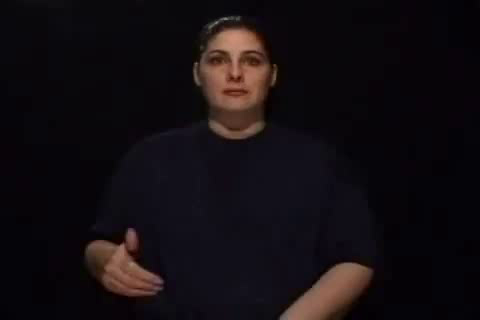

1


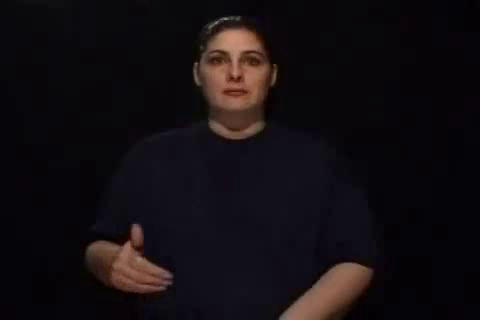

1


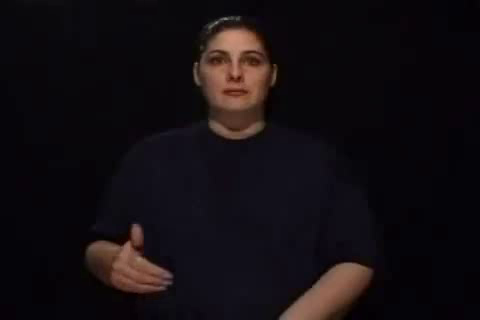

1


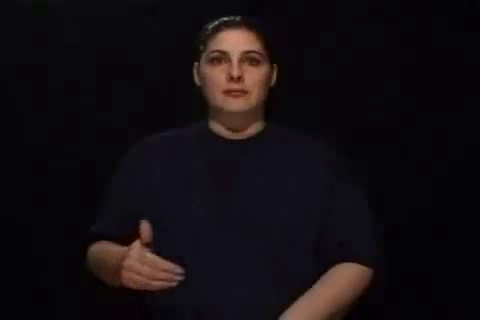

1


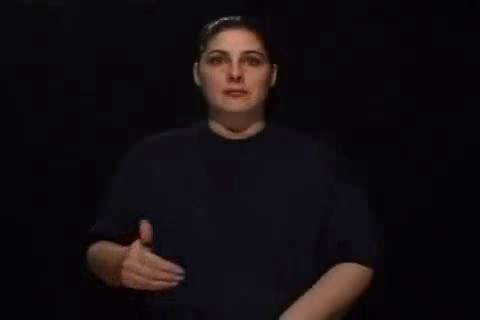

1


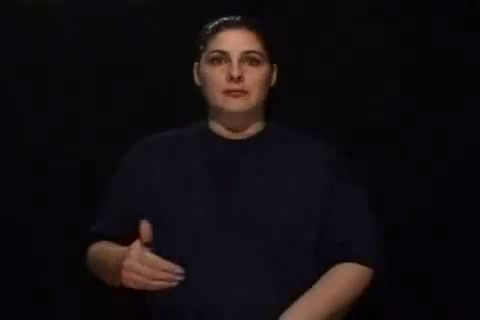

1


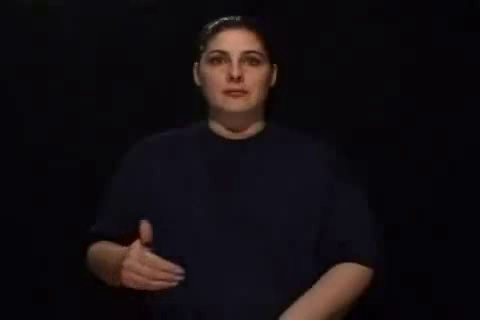

1


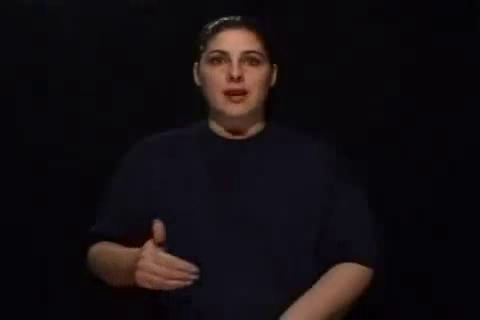

1


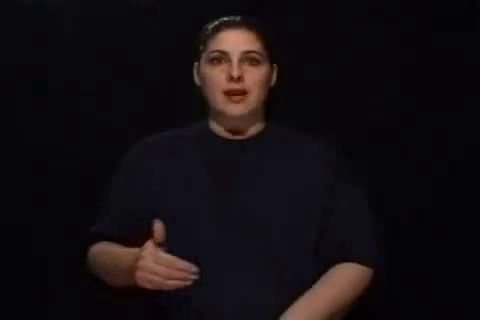

1


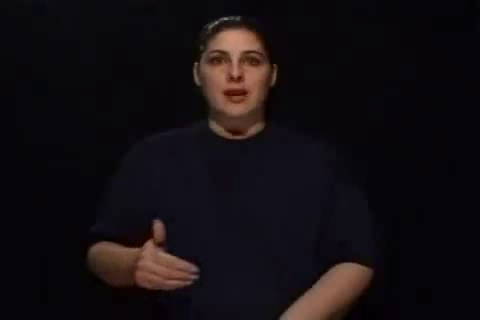

1


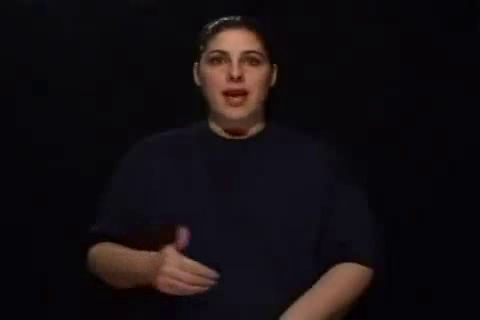

1


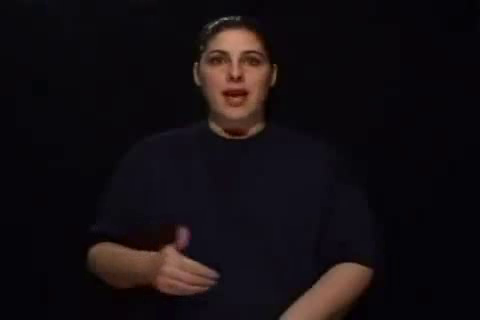

1


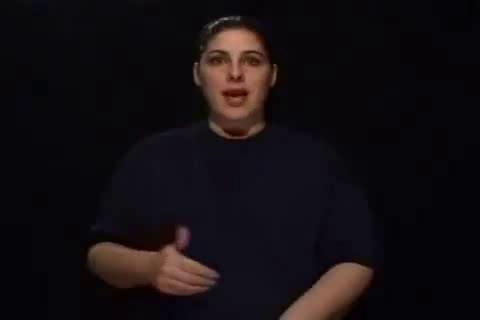

1


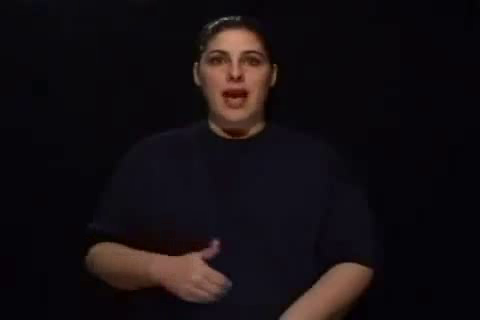

1


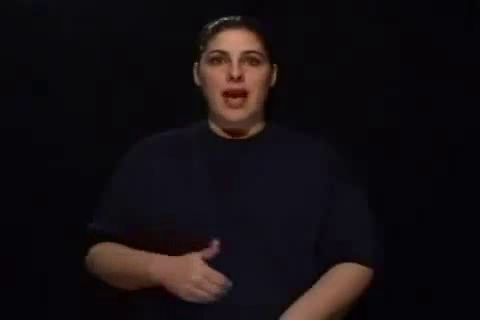

0


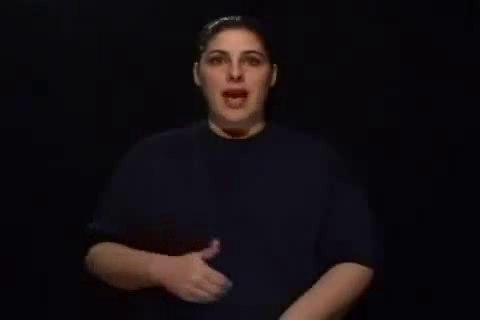

1


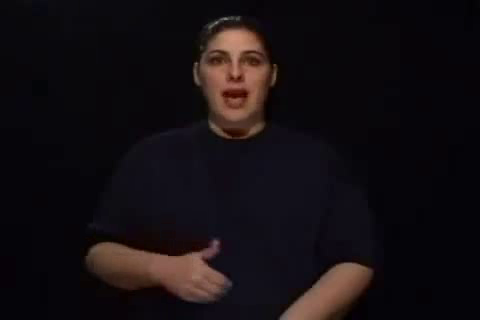

1


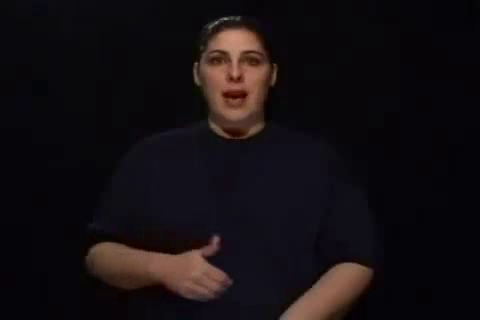

1


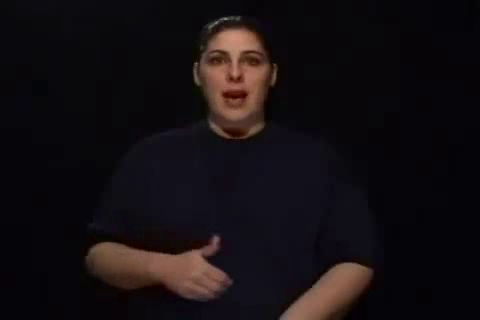

1


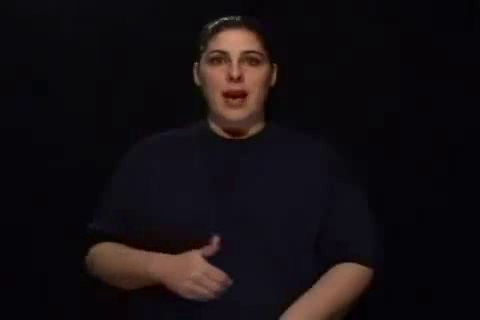

1


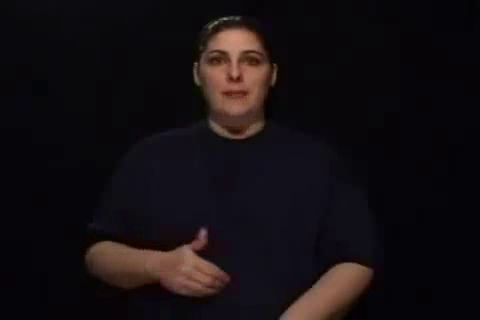

1


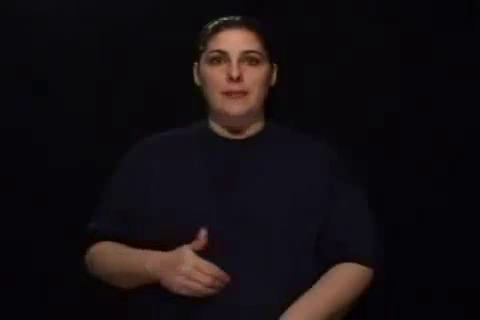

1


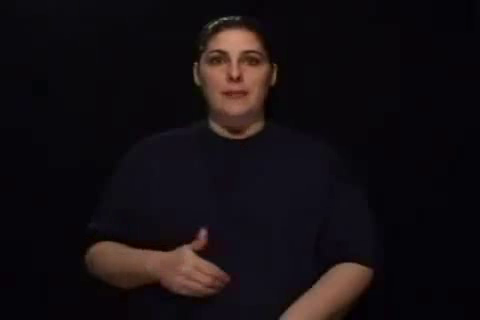

1


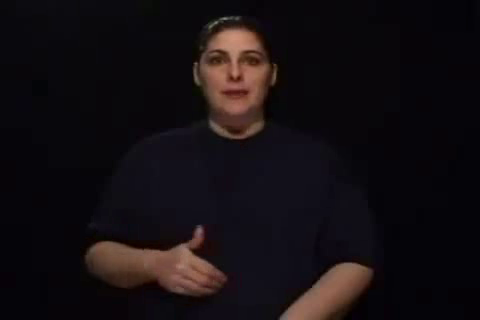

1


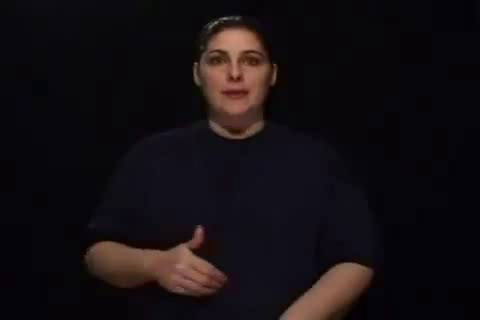

1


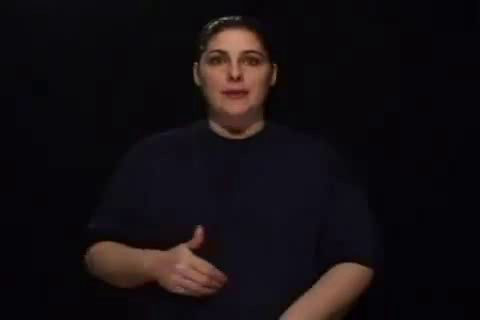

1


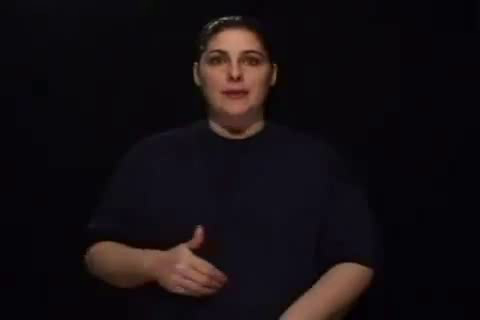

1


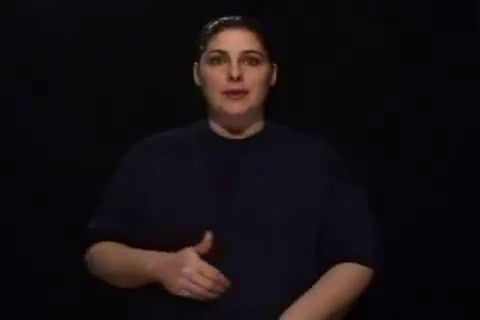

1


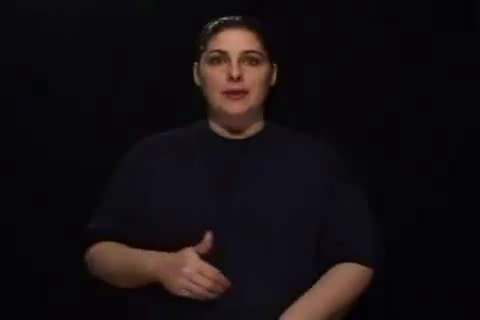

1


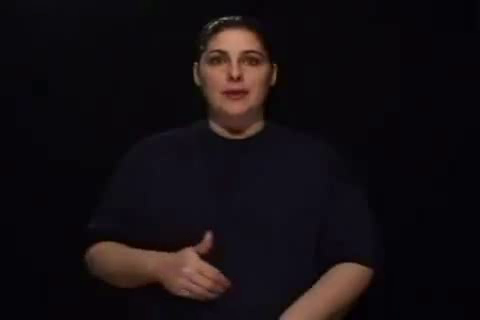

1


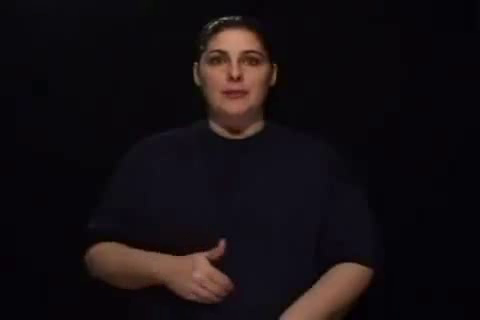

0


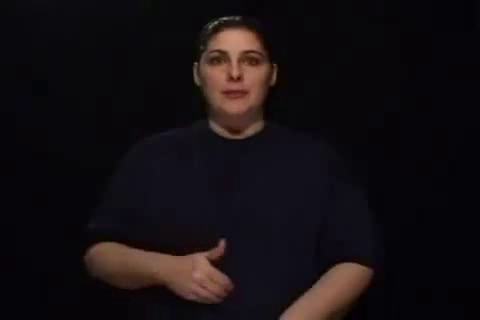

1


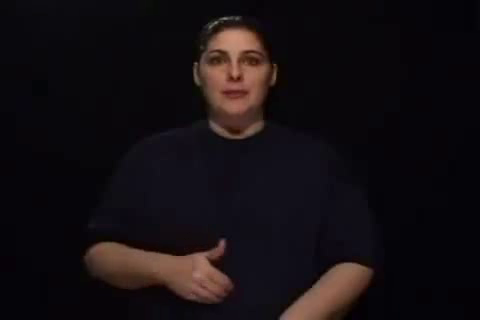

1


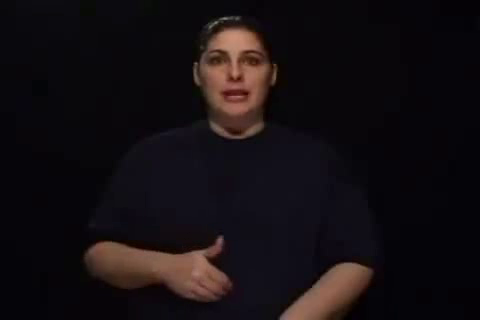

1


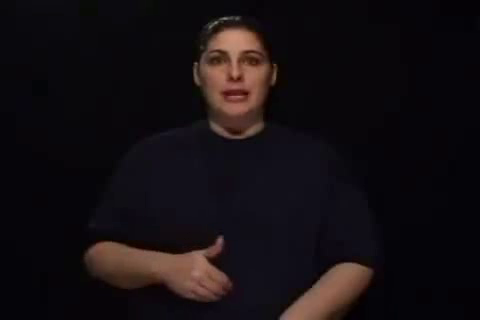

0


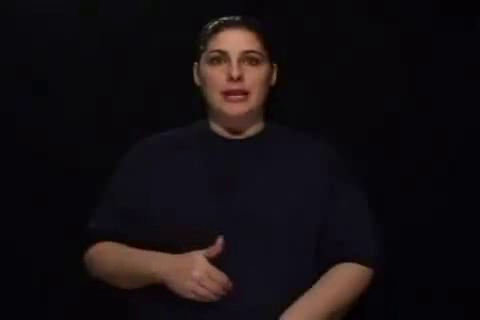

1


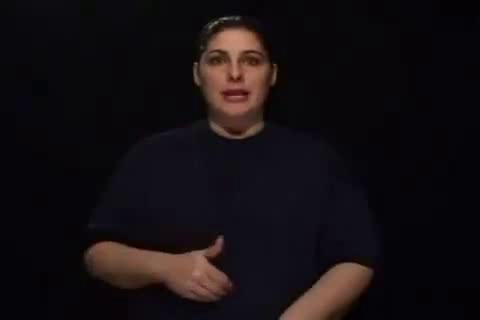

0


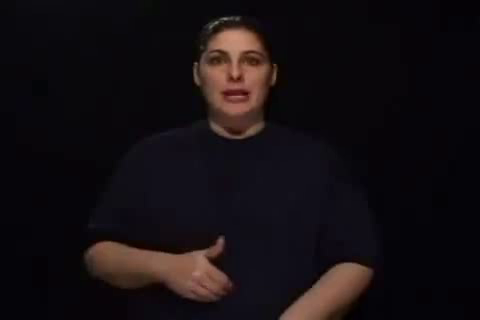

0


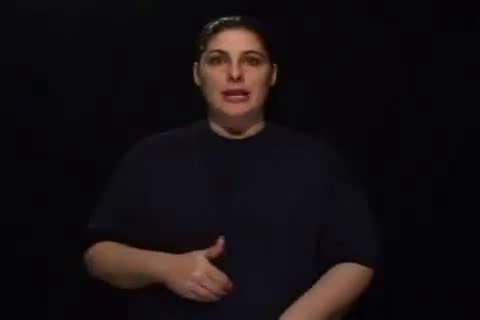

0


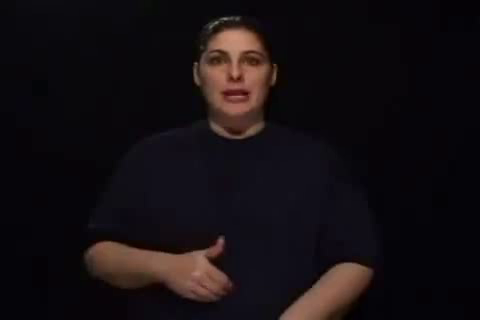

0


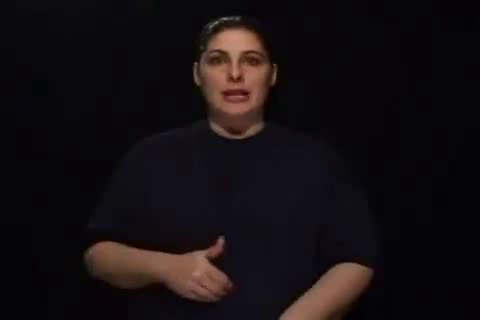

1


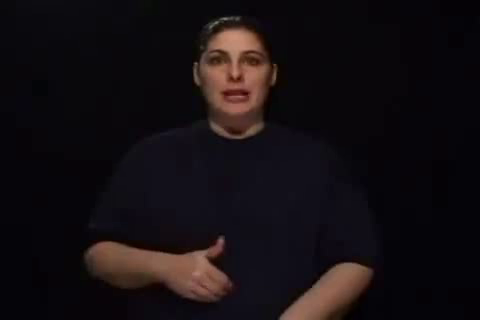

1


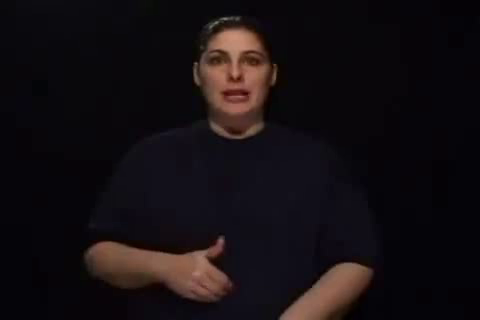

1


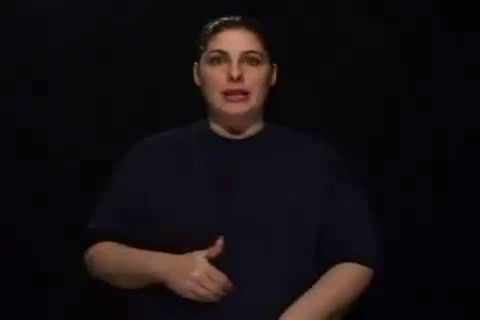

0


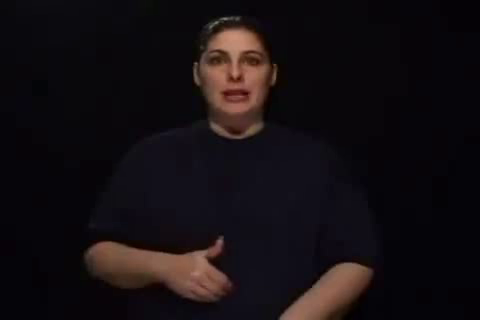

0


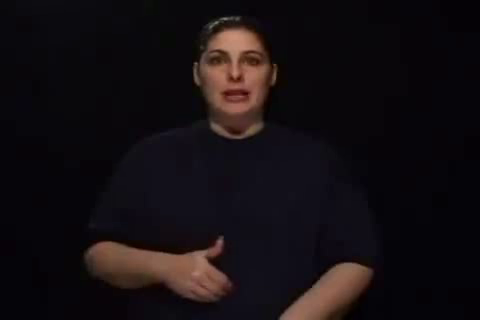

0


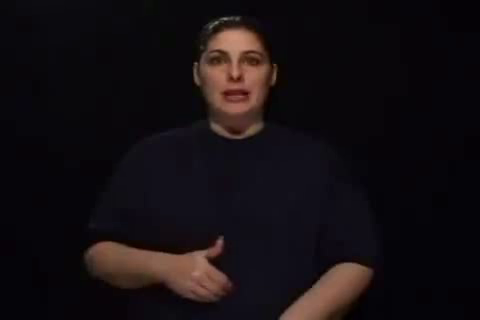

0


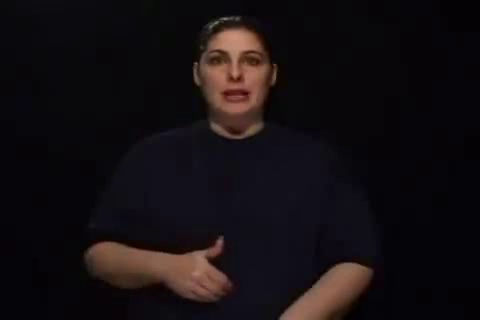

0


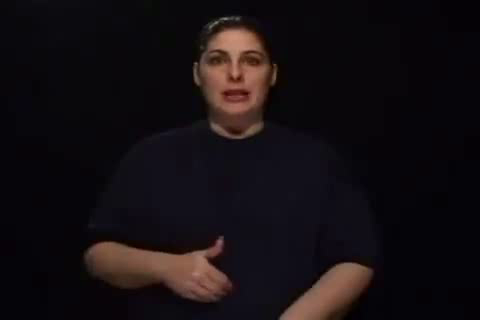

0


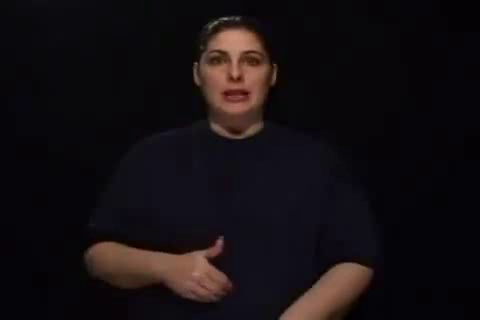

0


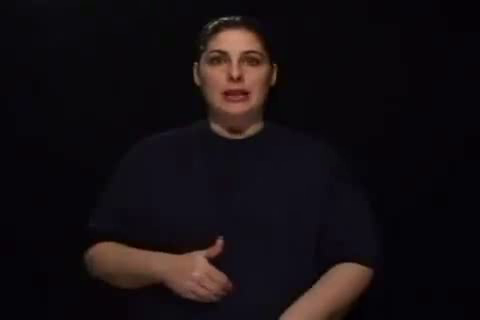

0


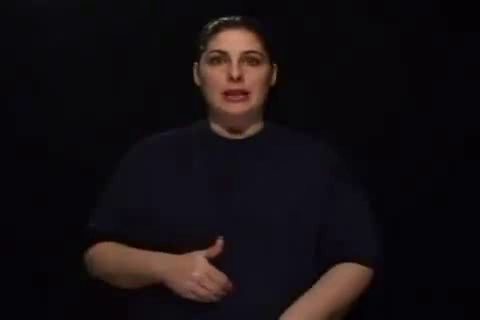

0


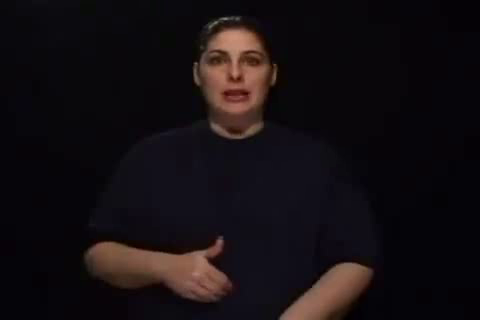

0


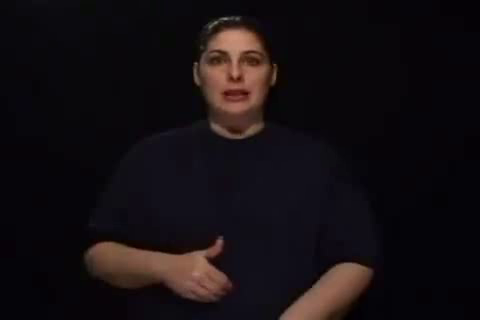

0


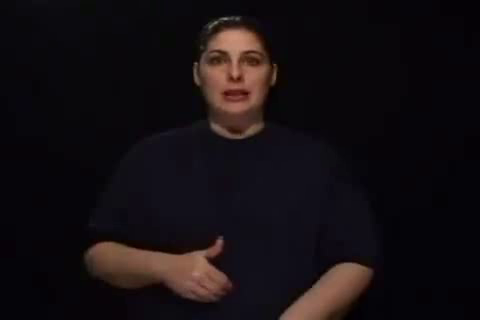

0


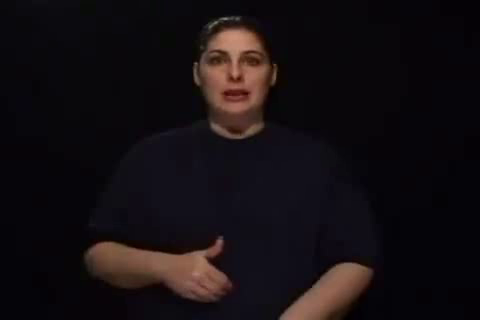

0


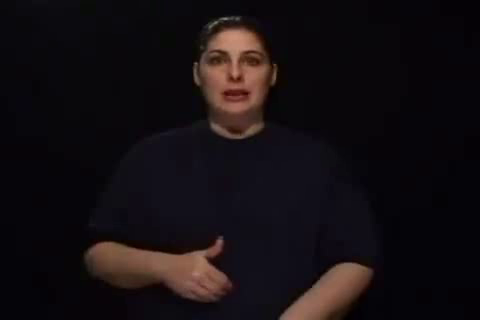

0


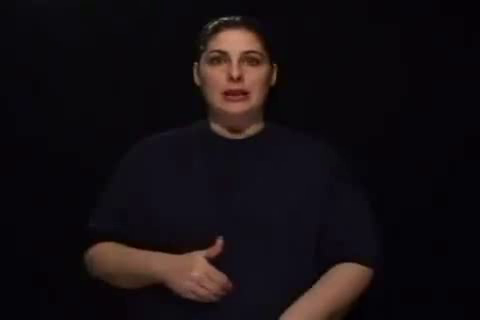

0


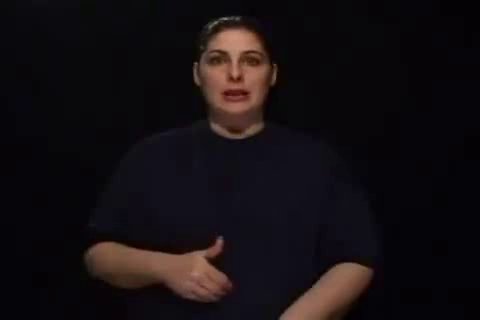

0


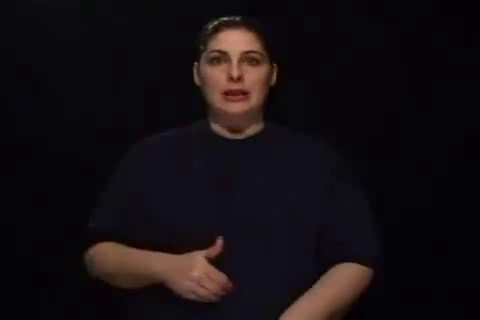

0
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [ ]:
with mp_hands.Hands(
        static_image_mode=True,
        max_num_hands=2,
        min_detection_confidence=0.5) as hands:
    vid2 = cv2.VideoCapture("/content/drive/My Drive/EE8101_Deep_Learning/mp4_Videos/00333_abdomen.mp4")
    lst = []
    query = True
    while query:
        ret, frame = vid2.read()
        if ret:
            cv2_imshow(frame)
            results = hands.process(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
            handedness = results.multi_handedness
            if handedness:
                print(len(handedness))
                lst.append(len(handedness))
            else:
                print(0)
                lst.append(0)
        else:
            query = False
    print(lst)

In [ ]:
vid = cv2.VideoCapture("/content/drive/My Drive/EE8101_Deep_Learning/mp4_Videos/00333_abdomen.mp4")
print('yeah')
while query:
    
    ret, frame = vid.read()
    if ret:
        print(True)
    else:
        break

yeah


In [ ]:
df

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21


In [ ]:
df = df.append({str(i): i for i in range(1,22)}, ignore_index = True)

In [ ]:
df.to_csv("/content/drive/My Drive/EE8101_Deep_Learning/draft_02/test2.csv")

In [ ]:
lmao = pd.read_csv("/content/drive/My Drive/EE8101_Deep_Learning/draft_02/test2.csv")

In [ ]:
lmao.loc[0]

Unnamed: 0     0
1              1
2              2
3              3
4              4
5              5
6              6
7              7
8              8
9              9
10            10
11            11
12            12
13            13
14            14
15            15
16            16
17            17
18            18
19            19
20            20
21            21
Name: 0, dtype: int64

### **Demo of numpy file:**<br>
Selecting the numpy file "/content/drive/MyDrive/EE8101 Deep Learning/Vid_to_np_array/00295_a.npy" and print the numpy.<br>
Observe the zero padding with "nan" for the 2nd hand.<br>
Also note: In the scenario where only 1 hand detected numpy[0] will always contain the hand lanmark coordinate data, while numpy[1] will always be empty. This is regardless of left / right hand, and MediaPipe does not differentiate left / right hand in the scenario where only 1 hand is detected.

In [ ]:
np.load("/content/drive/MyDrive/EE8101_Deep_Learning/Vid_to_np_array/00295_a.npy")[1]

array([[[ 2.39364684e-01,  6.72565877e-01, -3.05471331e-05],
        [ 2.67917365e-01,  6.41028404e-01, -1.42814433e-02],
        [ 2.88576514e-01,  5.92623889e-01, -2.40088515e-02],
        [ 2.96613216e-01,  5.55976748e-01, -3.63922864e-02],
        [ 2.93923289e-01,  5.27446806e-01, -4.52845357e-02],
        [ 2.66048133e-01,  5.59506774e-01, -2.10120641e-02],
        [ 2.72096336e-01,  5.25520146e-01, -5.09815216e-02],
        [ 2.73033470e-01,  5.66723108e-01, -5.52991964e-02],
        [ 2.70431817e-01,  5.96532583e-01, -5.02436236e-02],
        [ 2.46189773e-01,  5.63356340e-01, -2.80516557e-02],
        [ 2.48663962e-01,  5.29868722e-01, -6.86567202e-02],
        [ 2.52717465e-01,  5.77779472e-01, -7.16820210e-02],
        [ 2.50937551e-01,  6.07572615e-01, -6.31333888e-02],
        [ 2.24914744e-01,  5.71780145e-01, -3.85882109e-02],
        [ 2.27910519e-01,  5.38418353e-01, -7.29808137e-02],
        [ 2.35350698e-01,  5.80761313e-01, -6.93111792e-02],
        [ 2.34607771e-01